In [77]:
import time
import numpy as np 
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.font_manager
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn import svm
from sklearn import metrics
from sklearn import tree
from sklearn.metrics import recall_score
from sklearn.metrics import precision_score

In [78]:
data = pd.read_csv('data.csv')
data = pd.DataFrame(data)
print(data)

      index  Year  TT.PRI.MRCH.XD.WD  TG.VAL.TOTL.GD.ZS  SP.URB.TOTL.IN.ZS  \
0         0  2005                100                 70             80.122   
1         1  2005                100                 70             80.122   
2         2  2005                100                 70             80.122   
3         3  2005                100                 70             80.122   
4         4  2005                100                 70             80.122   
...     ...   ...                ...                ...                ...   
1540   1540  2020                165                 51             67.354   
1541   1541  2020                165                 51             67.354   
1542   1542  2020                165                 51             67.354   
1543   1543  2020                165                 51             67.354   
1544   1544  2020                165                 51             67.354   

      SP.URB.GROW_y  SP.URB.GROW_x  SP.RUR.TOTL.ZS  SP.RUR.TOTL

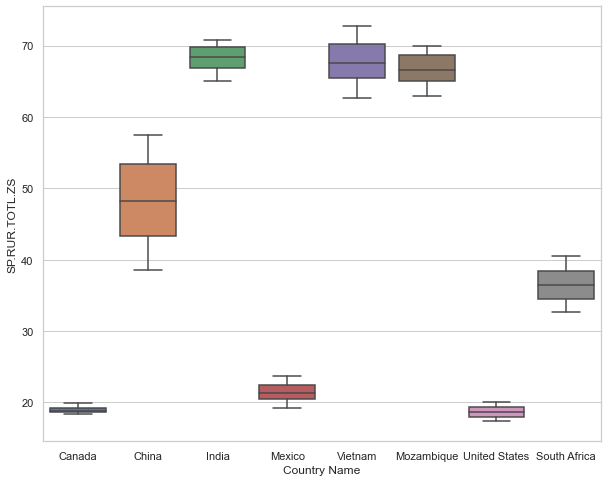

In [82]:
x = data['Country Name']
y = data['SP.RUR.TOTL.ZS']
plt.figure(figsize=(10,8))
ax = sns.boxplot(x="Country Name", y="SP.RUR.TOTL.ZS", data=data)

In [39]:
# Drop coloums with string, we only keep the numeric features
data = data.drop(columns=["Country Name", "Country Code", "Continent"])
columns = data.columns
print(data)


      index  Year  TT.PRI.MRCH.XD.WD  TG.VAL.TOTL.GD.ZS  SP.URB.TOTL.IN.ZS  \
0         0  2005                100                 70             80.122   
1         1  2005                100                 70             80.122   
2         2  2005                100                 70             80.122   
3         3  2005                100                 70             80.122   
4         4  2005                100                 70             80.122   
...     ...   ...                ...                ...                ...   
1540   1540  2020                165                 51             67.354   
1541   1541  2020                165                 51             67.354   
1542   1542  2020                165                 51             67.354   
1543   1543  2020                165                 51             67.354   
1544   1544  2020                165                 51             67.354   

      SP.URB.GROW_y  SP.URB.GROW_x  SP.RUR.TOTL.ZS  SP.RUR.TOTL

In [52]:
print(data['SL.UEM.TOTL.ZS'])

0        6.760000
1        6.760000
2        6.760000
3        6.760000
4        6.760000
          ...    
1540    29.219999
1541    29.219999
1542    29.219999
1543    29.219999
1544    29.219999
Name: SL.UEM.TOTL.ZS, Length: 1545, dtype: float64


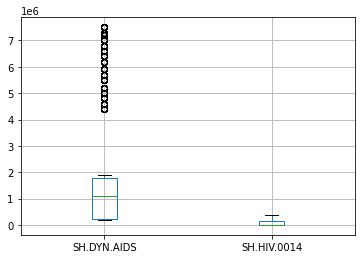

In [13]:
boxplot = data.boxplot(column=["SH.DYN.AIDS", "SH.HIV.0014"], return_type='axes')
# boxplot = data.boxplot(column=["SH.STA.OWAD.ZS","SH.DYN.AIDS.DH","SN.ITK.DEFC"], return_type='axes')

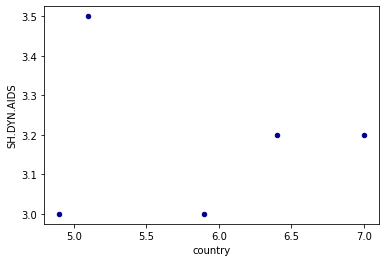

In [16]:
df = pd.DataFrame([[5.1, 3.5], [4.9, 3.0], [7.0, 3.2],
                   [6.4, 3.2], [5.9, 3.0]],
                  columns=['country', 'SH.DYN.AIDS'])
ax1 = df.plot.scatter(x='country',
                      y='SH.DYN.AIDS',
                      c='DarkBlue')

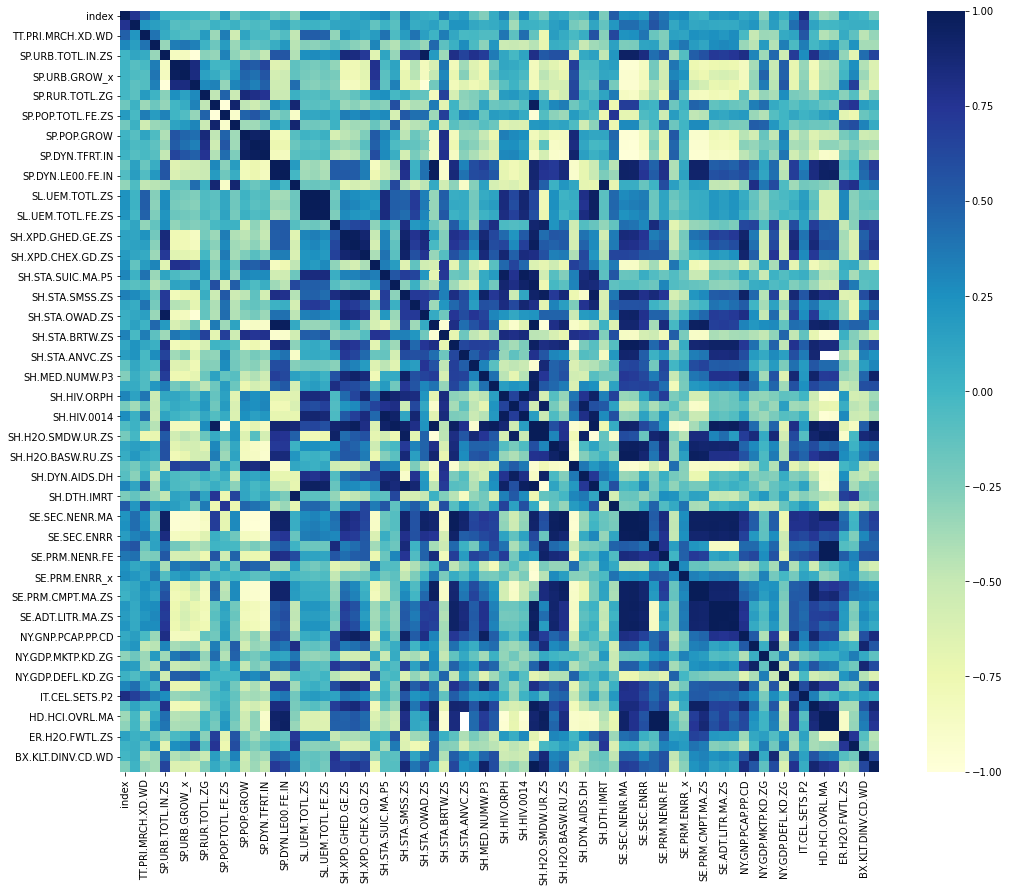

In [50]:
f, ax = plt.subplots(figsize=(17, 14))
ax = sns.heatmap(data.corr(),cmap="YlGnBu", ax=ax)

In [51]:
corr = data.corr()

corr.style.background_gradient(cmap='coolwarm')

In [70]:
# print(data.corrwith(data["SH.DYN.AIDS"]))
series = data.corrwith(data["SH.DYN.AIDS"])
display(series.nlargest(15))

SH.DYN.AIDS          1.000000
SH.H2O.SMDW.ZS       0.991027
SH.STA.SMSS.ZS       0.975533
SH.HIV.0014          0.962035
SL.UEM.TOTL.MA.ZS    0.956075
SL.UEM.TOTL.ZS       0.948709
SH.HIV.ORPH          0.935999
SL.UEM.TOTL.FE.ZS    0.933612
SH.STA.SUIC.MA.P5    0.919786
SH.STA.OWGH.ME.ZS    0.884812
SH.STA.SUIC.FE.P5    0.853521
SH.DYN.AIDS.DH       0.734165
SH.STA.BRTW.ZS       0.710140
SE.XPD.TOTL.GD.ZS    0.588033
SH.HIV.INCD.14       0.580626
dtype: float64

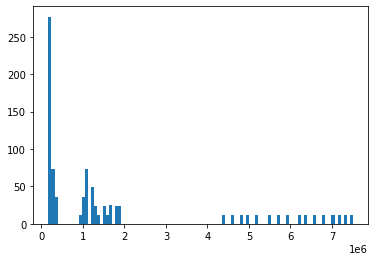

In [18]:
# plt.xlim(xmin=0.0, xmax = 0.25)
plt.hist(data['SH.DYN.AIDS'],bins=100)
plt.show()

In [20]:
# We finish the graphs !!!!!

In [40]:
# Drop the rows with NaN in 'SH.DYN.AIDS' column
# data.dropna(subset=['SH.DYN.AIDS'],inplace=True)
# for i in data['SH.DYN.AIDS']:
#     print(i)

# Deal with NaN values
# if the total number of NaN in a column is less than 30% of total values, then replace it with mean. Otherwise, drop that row
# for column in data:
#     # print(data[column])
#     if (data[column].isna().sum()) <= int(len(data)*0.3):
#         data[column].fillna(data[column].mean())


data.fillna(data.mean(axis=0),inplace=True)     


In [41]:
print(data['SH.DYN.AIDS'])

0       1.864961e+06
1       1.864961e+06
2       1.864961e+06
3       1.864961e+06
4       1.864961e+06
            ...     
1540    7.500000e+06
1541    7.500000e+06
1542    7.500000e+06
1543    7.500000e+06
1544    7.500000e+06
Name: SH.DYN.AIDS, Length: 1545, dtype: float64


In [42]:
# Add a lable column
my_max = data['SH.DYN.AIDS'].loc[data['SH.DYN.AIDS'].idxmax()].astype(np.int64)
my_min = data['SH.DYN.AIDS'].loc[data['SH.DYN.AIDS'].idxmin()].astype(np.int64)
my_range = (my_max-my_min).astype(np.int64)
print("max: ", my_max, "min: ", my_min, "range: ", my_range)
label_range = list(np.arange(my_min, my_max, my_range/5))
data['label'] = 0
for i in range(5):
    data.loc[data['SH.DYN.AIDS'] >= label_range[i], 'label'] = i+1
print(data[['SH.DYN.AIDS','label']])

max:  7500000 min:  170000 range:  7330000
       SH.DYN.AIDS  label
0     1.864961e+06      2
1     1.864961e+06      2
2     1.864961e+06      2
3     1.864961e+06      2
4     1.864961e+06      2
...            ...    ...
1540  7.500000e+06      5
1541  7.500000e+06      5
1542  7.500000e+06      5
1543  7.500000e+06      5
1544  7.500000e+06      5

[1545 rows x 2 columns]


In [55]:
data['umemployment_label'] = 0
for i in range(2):
    data.loc[data['SL.UEM.TOTL.ZS'] >= 7.31, 'umemployment_label'] = i
# print(data['SL.UEM.TOTL.ZS'].mean())

In [43]:
# Split the data for training and testing with selected features
# X: data; Y: lable
feature_cols = ["SH.H2O.SMDW.ZS","SH.STA.SMSS.ZS","SH.HIV.0014","SL.UEM.TOTL.MA.ZS","SL.UEM.TOTL.ZS","SH.HIV.ORPH","SL.UEM.TOTL.FE.ZS","SH.STA.SUIC.MA.P5","SH.STA.OWGH.ME.ZS","SH.STA.SUIC.FE.P5"]
X = data[feature_cols]
Y = data[['label']]
x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size=0.33)
print(x_train.shape, x_test.shape, y_train.shape, y_test.shape)

(1035, 10) (510, 10) (1035, 1) (510, 1)


In [76]:
sns.set_theme(style="whitegrid")

ax = sns.boxplot(x=data[["SH.H2O.SMDW.ZS","SH.HIV.0014"]])

ValueError: The truth value of a Series is ambiguous. Use a.empty, a.bool(), a.item(), a.any() or a.all().

In [29]:
# if we don't select features
X = data.iloc[:,:-1]
x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size=0.33)

In [44]:
# Normalisation
# fit scaler on training data
norm = MinMaxScaler().fit(x_train)
# transform training data
x_train_norm = norm.transform(x_train)
# transform testing dataabs
x_test_norm = norm.transform(x_test)

In [45]:
print(x_train_norm)

[[0.65688996 0.58667144 0.31686763 ... 0.09356725 0.54545455 0.40322581]
 [0.02365011 0.28001906 0.00158688 ... 0.03508772 0.43636364 0.0483871 ]
 [0.65688996 0.52710828 0.39169532 ... 0.50877193 0.34545455 0.46774194]
 ...
 [0.65688996 0.52710828 0.00687649 ... 0.11988304 0.30909091 0.26612903]
 [0.93535864 0.9946407  0.31686763 ... 0.3625731  0.53636364 0.33064516]
 [0.99999433 0.83172695 0.31686763 ... 0.31871345 0.9        0.38709677]]


In [31]:
# Decision Tree
# Create Decision Tree classifer object
t0=time.time()
# criterion="entropy",
clf = DecisionTreeClassifier(criterion="entropy", max_depth=2)
# Train Decision Tree Classifer
clf = clf.fit(x_train,y_train)
t1=time.time()
#Predict the response for test dataset
y_pred = clf.predict(x_test)
# Model Accuracy, how often is the classifier correct?
print("--------Decision Tree--------")
print("Time to construct the model: ", t1-t0)
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))
print("Recall: ",recall_score(y_test, y_pred, average='macro'))
print("Precision: ",precision_score(y_test, y_pred, average='weighted'))

--------Decision Tree--------
Time to construct the model:  0.011353254318237305
Accuracy: 0.9294117647058824
Recall:  0.6
Precision:  0.8991596638655461


/Users/skye/opt/anaconda3/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1245: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


[Text(167.4, 181.2, 'X[6] <= 17.481\nentropy = 1.584\nsamples = 1035\nvalue = [416, 486, 8, 64, 61]'),
 Text(83.7, 108.72, 'X[5] <= 674935.812\nentropy = 0.996\nsamples = 902\nvalue = [416, 486, 0, 0, 0]'),
 Text(41.85, 36.23999999999998, 'entropy = 0.0\nsamples = 286\nvalue = [286, 0, 0, 0, 0]'),
 Text(125.55000000000001, 36.23999999999998, 'entropy = 0.743\nsamples = 616\nvalue = [130, 486, 0, 0, 0]'),
 Text(251.10000000000002, 108.72, 'X[3] <= 22.926\nentropy = 1.268\nsamples = 133\nvalue = [0, 0, 8, 64, 61]'),
 Text(209.25, 36.23999999999998, 'entropy = 0.0\nsamples = 64\nvalue = [0, 0, 0, 64, 0]'),
 Text(292.95, 36.23999999999998, 'entropy = 0.518\nsamples = 69\nvalue = [0, 0, 8, 0, 61]')]

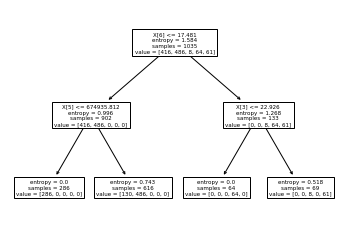

In [26]:
tree.plot_tree(clf)

In [32]:
# Gradient Boosting
t0=time.time()
clf = GradientBoostingClassifier(n_estimators=100, learning_rate=0.005,max_depth=1, random_state=0).fit(x_train, y_train)
clf = clf.fit(x_train,y_train)
t1=time.time()
#Predict the response for test dataset
y_pred = clf.predict(x_test)
# Model Accuracy, how often is the classifier correct?
print("--------Gradient Boosting--------")
print("Time to construct the model: ", t1-t0)
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))
print("Recall: ",recall_score(y_test, y_pred, average='macro'))
print("Precision: ",precision_score(y_test, y_pred, average='weighted'))

/Users/skye/opt/anaconda3/lib/python3.8/site-packages/sklearn/utils/validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)
/Users/skye/opt/anaconda3/lib/python3.8/site-packages/sklearn/utils/validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


--------Gradient Boosting--------
Time to construct the model:  1.7980918884277344
Accuracy: 0.9215686274509803
Recall:  0.7555555555555555
Precision:  0.8660269781671535


/Users/skye/opt/anaconda3/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1245: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [33]:
# Random Forest
t0=time.time()
clf = RandomForestClassifier(max_depth=2, random_state=0)
clf = clf.fit(x_train,y_train)
t1=time.time()
#Predict the response for test dataset
y_pred = clf.predict(x_test)
# Model Accuracy, how often is the classifier correct?
print("--------Random Forest--------")
print("Time to construct the model: ", t1-t0)
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))
print("Recall: ",recall_score(y_test, y_pred, average='macro'))
print("Precision: ",precision_score(y_test, y_pred, average='weighted'))

--------Random Forest--------
Time to construct the model:  0.14847898483276367
Accuracy: 0.9294117647058824
Recall:  0.6
Precision:  0.896014143362263


<ipython-input-33-0226a2ed33c1>:4: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  clf = clf.fit(x_train,y_train)
/Users/skye/opt/anaconda3/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1245: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [ ]:
# We finished part2!!!!!

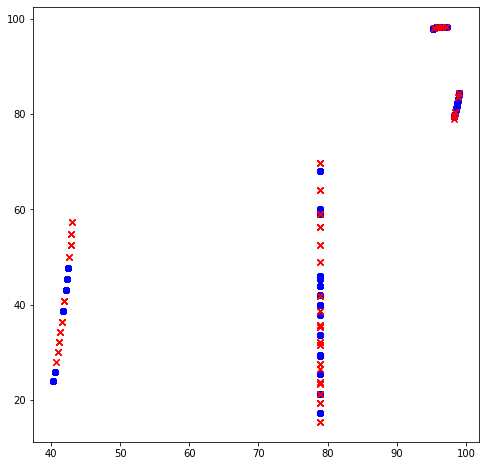

In [63]:
# one-class SVM - outliers
df1 = data[['SH.DYN.AIDS','label']]
# df1 = data[['SL.UEM.TOTL.ZS', 'umemployment_label']]
df2 = data[['SL.UEM.TOTL.ZS']]
clf = svm.OneClassSVM(nu=0.03, kernel='rbf', gamma=0.1)
clf.fit(x_train)
pred = clf.predict(x_train)
normal = x_train[pred == 1]
abnormal = x_train[pred == -1]
# print(normal.values[:, 0])
plt.figure(figsize=(8,8))
plt.plot(normal.values[:, 0], normal.values[:, 1], 'bo')
plt.plot(abnormal.values[:, 0], abnormal.values[:, 1], 'rx')

# plt.plot(normal.values[:, 0], normal.values[:, 1])
# plt.plot(abnormal.values[:, 0], abnormal.values[:, 1], color='r')
# plt.show()


In [65]:
# one-class SVM - Anomaly Detection
# fit the model

clf = svm.OneClassSVM(nu=0.5, kernel='rbf', gamma=0.1)
clf.fit(x_train)
y_pred_train = clf.predict(x_train) # return 1,-1
y_pred_test = clf.predict(x_test)   # return 1,-1

# fp/fn
n_error_train = y_pred_train[y_pred_train == -1].size
n_error_test = y_pred_test[y_pred_test == -1].size

"""
Visualization of the result.
"""


'\nVisualization of the result.\n'

In [71]:
plt.scatter(x_train)
plt.show()

TypeError: scatter() missing 1 required positional argument: 'y'

In [51]:
import random
from sklearn.datasets import make_blobs
random.seed(13)
x, _ = make_blobs(n_samples=200, centers=1, cluster_std=.3, center_box=(8, 8))
# plt.scatter(x[:,0], x[:,1])
# plt.show()
print(x)

[[7.69192349 8.63808262]
 [7.64138345 8.16969305]
 [8.36254272 8.34159918]
 [7.74673029 8.40911865]
 [7.8228004  8.167197  ]
 [7.81578871 7.88359697]
 [8.17862083 7.45545903]
 [8.18581919 7.74284771]
 [7.68901423 8.22598495]
 [8.02787827 7.10085023]
 [8.43020953 8.40023186]
 [7.93626483 7.72466909]
 [8.27977202 8.06508951]
 [7.88112153 7.67333553]
 [7.77658119 7.92149541]
 [8.01774858 8.31806314]
 [7.98724843 8.3012491 ]
 [8.84873521 7.80193589]
 [8.32689249 8.04346066]
 [8.06153227 7.94853599]
 [7.9539728  8.09196281]
 [8.33019501 7.55951303]
 [8.17957138 8.2401645 ]
 [7.59649672 7.94467855]
 [8.10005201 8.11499357]
 [7.372466   8.1510525 ]
 [7.44052633 8.01108122]
 [7.96892482 7.29957398]
 [7.96483362 8.84876087]
 [8.17933629 8.40753022]
 [8.27322298 7.88678615]
 [8.12483781 8.22887077]
 [8.2169191  7.79251427]
 [8.02855763 7.84412949]
 [7.77293717 8.13661205]
 [8.41319062 8.4851696 ]
 [7.55778581 6.99504402]
 [7.67133253 7.6814539 ]
 [8.47558772 7.96510873]
 [8.15475924 7.94891733]
